**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Operaciones de Aprendizaje Automático**

Tecnológico de Monterrey

**Fase 1 – Procesamiento y Modelado Inicial**
En esta primera etapa aprenderás a trabajar con los datos y a construir tus primeros modelos:

* Realizar un análisis del problema y generar una propuesta de valor.
* Manipular y preparar datos.
* Explorar y preprocesar información.
* Aplicar técnicas de versionado para asegurar reproducibilidad y trazabilidad.
* Construir, ajustar y evaluar modelos de Machine Learning.

---

**EQUIPO 10**

**ALUMNOS:**

Gabriela Lizeth Moreno Hernández - AXXXXX

Alejandro Chávez Campos  -  AXXXXX

Carlos Armando Alcántar Sánchez - A01311747

Luis Fernando Caporal Montes de Oca  -  A01795898

Yamil Abraham Nechar Reyes - A01795726

# Modelado con pycaret sobre diferentes datasets ya procesados



In [1]:
# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pointbiserialr
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from pycaret.classification import predict_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pycaret.classification import setup, compare_models
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from pathlib import Path


# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
def apply_models(file_name, optimizacion='F1'):

    ruta_actual = Path().cwd()
    ruta_csv = ruta_actual.parent.parent / "MNA_MLOps_Equipo12" / "data" / "processed" / f"{file_name}.csv"
    
    df = pd.read_csv(ruta_csv)
    df.fillna(df.mean(), inplace=True)


    X = df.drop(columns='A86')
    y = df['A86']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    train_data = X_train.copy()
    train_data['A86'] = y_train


    clf_setup = setup(
        data=train_data,
        target='A86',
        session_id=42,
        fix_imbalance=True,
        normalize=True,           # normaliza las features automáticamente
        fold=5                    # cross-validation
    )


    # Encuentra el mejor modelo automáticamente
    best_model = compare_models(
        sort='F1',      # dado que es desbalanceado, AUC es un buen criterio
        n_select=1
    )


    # Crear DataFrame de test
    test_data = X_test.copy()
    test_data['target'] = y_test

    # Predicciones
    predictions = predict_model(best_model, data=test_data)
    predictions.head()


    # Matriz de confusión
    y_true = predictions['target']
    y_pred = predictions['prediction_label']  # PyCaret crea esta columna con las predicciones finales

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

    # Mostrar
    disp.plot(cmap='Blues')
    plt.title("Matriz de Confusión - Test Set")
    plt.show()


# dataset_tratado_20251011_235706.csv

,Description,Value
0,Session id,42
1,Target,A86
2,Target type,Binary
3,Original data shape,"(4644, 86)"
4,Transformed data shape,"(7500, 86)"
5,Transformed train set shape,"(6106, 86)"
6,Transformed test set shape,"(1394, 86)"
7,Numeric features,85
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9074,0.6650,0.1732,0.2037,0.1856,0.1372,0.1384,0.1520
xgboost,Extreme Gradient Boosting,0.9311,0.7051,0.1115,0.3262,0.1629,0.1358,0.1588,0.0880
lr,Logistic Regression,0.5738,0.5456,0.5322,0.0754,0.1320,0.0289,0.0528,0.5800
svm,SVM - Linear Kernel,0.5477,0.5292,0.5524,0.0734,0.1294,0.0251,0.0482,0.0480
dt,Decision Tree Classifier,0.8668,0.5373,0.1623,0.1085,0.1291,0.0609,0.0624,0.4200
lightgbm,Light Gradient Boosting Machine,0.9308,0.7117,0.0812,0.3176,0.1283,0.1031,0.1318,0.5960
knn,K Neighbors Classifier,0.6858,0.5527,0.3751,0.0765,0.1270,0.0292,0.0427,0.4580
gbc,Gradient Boosting Classifier,0.9286,0.7167,0.0814,0.2511,0.1203,0.0933,0.1107,0.6200
et,Extra Trees Classifier,0.9280,0.6633,0.0810,0.2704,0.1190,0.0916,0.1128,0.4900
rf,Random Forest Classifier,0.9268,0.6903,0.0809,0.2331,0.1156,0.0872,0.1023,0.1580


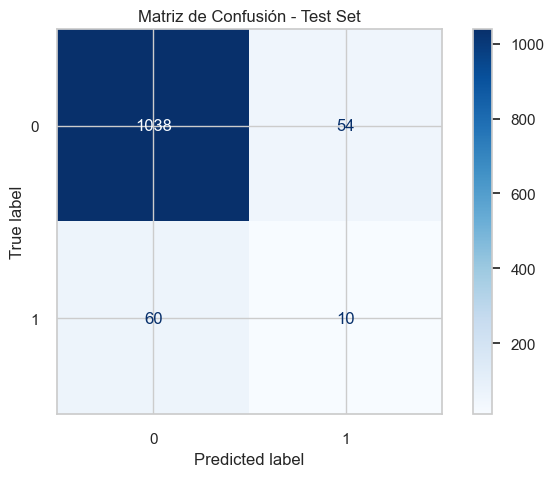

In [5]:
apply_models(file_name='dataset_tratado_20251011_235706', optimizacion='F1')

# dataset_tratado_20251011_235706

,Description,Value
0,Session id,42
1,Target,A86
2,Target type,Binary
3,Original data shape,"(4644, 86)"
4,Transformed data shape,"(7500, 86)"
5,Transformed train set shape,"(6106, 86)"
6,Transformed test set shape,"(1394, 86)"
7,Numeric features,85
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9074,0.6650,0.1732,0.2037,0.1856,0.1372,0.1384,0.1500
xgboost,Extreme Gradient Boosting,0.9311,0.7051,0.1115,0.3262,0.1629,0.1358,0.1588,0.0900
lr,Logistic Regression,0.5738,0.5456,0.5322,0.0754,0.1320,0.0289,0.0528,0.0420
svm,SVM - Linear Kernel,0.5477,0.5292,0.5524,0.0734,0.1294,0.0251,0.0482,0.0500
dt,Decision Tree Classifier,0.8668,0.5373,0.1623,0.1085,0.1291,0.0609,0.0624,0.0740
lightgbm,Light Gradient Boosting Machine,0.9308,0.7117,0.0812,0.3176,0.1283,0.1031,0.1318,0.6100
knn,K Neighbors Classifier,0.6858,0.5527,0.3751,0.0765,0.1270,0.0292,0.0427,0.0460
gbc,Gradient Boosting Classifier,0.9286,0.7167,0.0814,0.2511,0.1203,0.0933,0.1107,0.6380
et,Extra Trees Classifier,0.9280,0.6633,0.0810,0.2704,0.1190,0.0916,0.1128,0.1240
rf,Random Forest Classifier,0.9268,0.6903,0.0809,0.2331,0.1156,0.0872,0.1023,0.1740


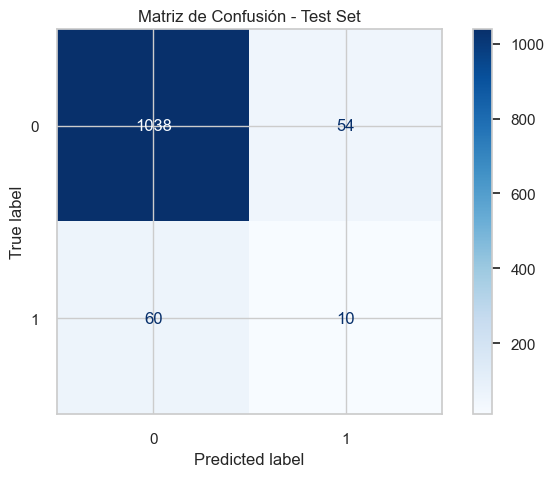

In [6]:
apply_models(file_name='dataset_tratado_20251011_235706', optimizacion='F1')

# dataset_tratado_20251012_000533.csv

,Description,Value
0,Session id,42
1,Target,A86
2,Target type,Binary
3,Original data shape,"(4644, 86)"
4,Transformed data shape,"(7500, 86)"
5,Transformed train set shape,"(6106, 86)"
6,Transformed test set shape,"(1394, 86)"
7,Numeric features,85
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9074,0.6650,0.1732,0.2037,0.1856,0.1372,0.1384,0.1500
xgboost,Extreme Gradient Boosting,0.9311,0.7051,0.1115,0.3262,0.1629,0.1358,0.1588,0.0860
lr,Logistic Regression,0.5738,0.5456,0.5322,0.0754,0.1320,0.0289,0.0528,0.0400
svm,SVM - Linear Kernel,0.5477,0.5292,0.5524,0.0734,0.1294,0.0251,0.0482,0.0440
dt,Decision Tree Classifier,0.8668,0.5373,0.1623,0.1085,0.1291,0.0609,0.0624,0.0760
lightgbm,Light Gradient Boosting Machine,0.9308,0.7117,0.0812,0.3176,0.1283,0.1031,0.1318,0.5580
knn,K Neighbors Classifier,0.6858,0.5527,0.3751,0.0765,0.1270,0.0292,0.0427,0.0440
gbc,Gradient Boosting Classifier,0.9286,0.7167,0.0814,0.2511,0.1203,0.0933,0.1107,0.6200
et,Extra Trees Classifier,0.9280,0.6633,0.0810,0.2704,0.1190,0.0916,0.1128,0.1060
rf,Random Forest Classifier,0.9268,0.6903,0.0809,0.2331,0.1156,0.0872,0.1023,0.1600


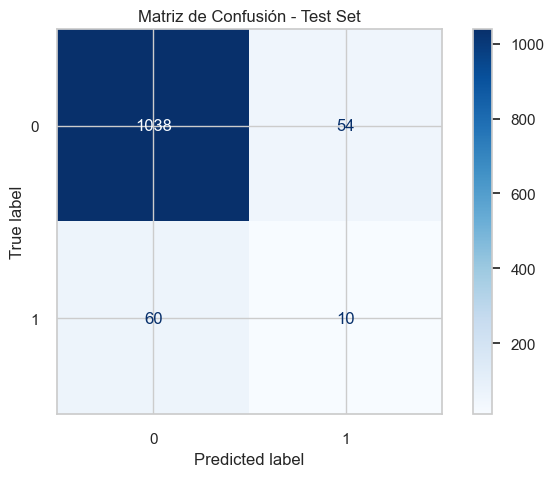

In [7]:
apply_models(file_name='dataset_tratado_20251012_000533', optimizacion='F1')